# Neural Networks with Keras: Gaussians and Lorentzians [FB]

In [1]:
# keras:
from tensorflow.keras import Sequential # Sequential is the neural-network class
from tensorflow.keras.layers import Dense # Dense is the standard network layer
# array math:
import numpy as np

# plotting:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=90 # highres display

2023-06-09 23:41:45.581478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
N_points = 50 #also number of input neurons

# Define network:
Net=Sequential() # creating a neural network!
Net.add(Dense(30,input_shape=(N_points,),activation="sigmoid")) # first hidden layer: 20 neurons (and Npoints input neuron!)
Net.add(Dense(10,activation="sigmoid")) # second hidden layer: 10 neurons
Net.add(Dense(2,activation="softmax")) # output layer: 2 neuron

# Compile network: (randomly initialize weights, choose advanced optimizer, set up everything!)
Net.compile(loss='categorical_crossentropy',
              optimizer='adam') # adam is adaptive and works better than normal gradient descent

2023-06-09 23:42:02.050289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# run this cell multiple times to train the network better and better!

# training on a simple 1D function:

training_batches=1000 # number of training batches
batchsize=1 # samples per batch
costs_lorentzian = np.zeros(training_batches) # array for storing costs
costs_gaussian = np.zeros(training_batches) # array for storing costs

# run through all training batches:
for j in range(training_batches):
    x_in=np.linspace(-10,10,N_points)# define x axis of function [FB]
    
    alpha_lorentzian = np.random.uniform(low=0.1, high = 1, size = [1,1]) #define random coefficient alpha of 1/(1+alpha*x_in^2)  [FB]
    y_in_lorentzian = 1/(1+alpha_lorentzian*x_in**2) #evaluate random  [FB]
    y_target_lorentzian=np.zeros((batchsize,2)) # produce correct outputs (our target)
    y_target_lorentzian[:,0] = 1
    costs_lorentzian[j]=Net.train_on_batch(y_in_lorentzian,y_target_lorentzian) # train on this batch of samples
    
    alpha_gaussian = np.random.uniform(low=0.1, high = 1, size = [1,1]) #define random coefficient alpha of 1/(1+alpha*x_in^2)  [FB]
    y_in_gaussian = np.exp(-alpha_gaussian*x_in**2) #evaluate random  [FB]
    y_target_gaussian = np.zeros((batchsize,2)) # produce correct outputs (our target)
    y_target_gaussian[:,1] = 1
    costs_gaussian[j]=Net.train_on_batch(y_in_gaussian,y_target_gaussian) # train on this batch of samples

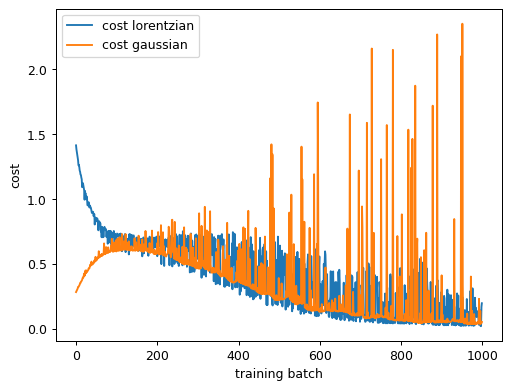

In [4]:
plt.plot(costs_lorentzian, label ='cost lorentzian')
plt.plot(costs_gaussian, label ='cost gaussian')
plt.xlabel('training batch')
plt.ylabel('cost')
plt.legend()

In [5]:
x_in=np.linspace(-10,10,N_points)# define x axis of function [FB]

alpha_lorentzian = np.random.uniform(low=0.1, high = 1, size = [1,1]) #define random coefficient alpha of 1/(1+alpha*x_in^2)  [FB]
y_in_lorentzian = 1/(1+alpha_lorentzian*x_in**2) #evaluate random  [FB]
result_lorentzian = Net.predict_on_batch(y_in_lorentzian)

alpha_gaussian = np.random.uniform(low=0.1, high = 1, size = [1,1]) #define random coefficient alpha of 1/(1+alpha*x_in^2)  [FB]
y_in_gaussian = np.exp(-alpha_gaussian*x_in**2) #evaluate random  [FB]
result_gaussian = Net.predict_on_batch(y_in_gaussian)

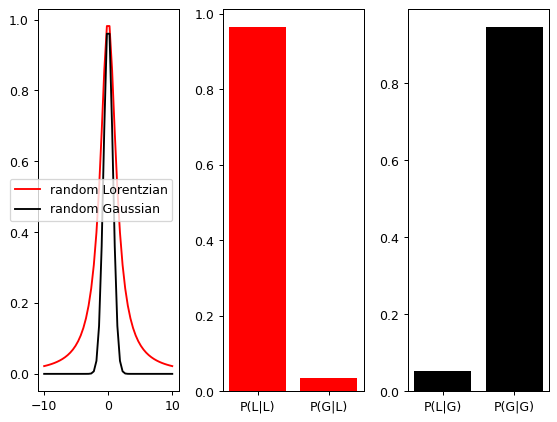

In [6]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(x_in,np.transpose(y_in_lorentzian), color = 'red',label="random Lorentzian")
ax1.plot(x_in,np.transpose(y_in_gaussian),color = 'black',label="random Gaussian")

ax1.legend()

result_lorentzian_plot = ['P(L|L)', 'P(G|L)'] #conditional prob.
ax2.bar(result_lorentzian_plot, np.array(result_lorentzian).flatten(), color = 'red')

result_gaussian_plot = ['P(L|G)', 'P(G|G)']
ax3.bar(result_gaussian_plot, np.array(result_gaussian).flatten(), color = 'black')

fig.tight_layout()

# Neural Networks with Keras: Gaussian and squares [FB]

In [7]:
# keras:
from tensorflow.keras import Sequential # Sequential is the neural-network class
from tensorflow.keras.layers import Dense # Dense is the standard network layer
# array math:
import numpy as np

# plotting:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=90 # highres display

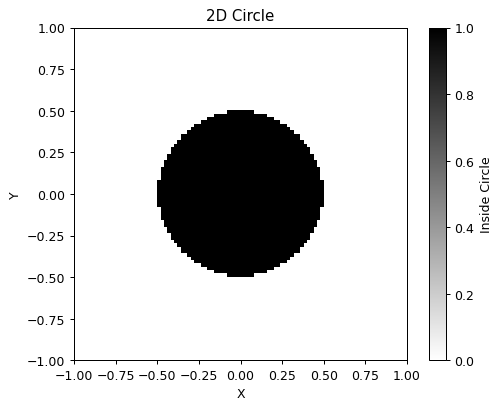

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
grid_size = 100
x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define the circle parameters
center = (0, 0)
radius = 0.5

# Calculate the distance from each point to the center of the circle
dist = np.sqrt((X - center[0])**2 + (Y - center[1])**2)

# Create a mask to identify points inside the circle
circle_mask = np.where(dist <= radius, 1, 0)

# Plot the circle
plt.imshow(circle_mask, extent=(-1, 1, -1, 1), cmap='binary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Circle')
plt.colorbar(label='Inside Circle')
plt.show()


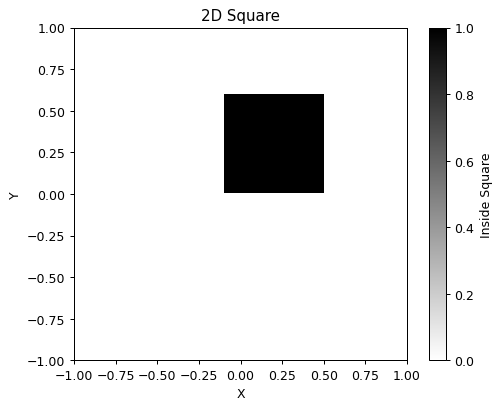

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def create_square_mask(center, size, grid_size):
    # Define the dimensions of the grid
    x = np.linspace(-1, 1, grid_size)
    y = np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)

    # Calculate the boundaries of the square
    left = center[0] - size / 2
    right = center[0] + size / 2
    bottom = center[1] - size / 2
    top = center[1] + size / 2

    # Create a mask to identify points inside the square
    square_mask = np.where((X >= left) & (X <= right) & (Y >= bottom) & (Y <= top), 1, 0)

    return square_mask

# Define the center and size of the square
center = (0.2, -0.3)
size = 0.6
grid_size = 100

# Create the square mask
square_mask = create_square_mask(center, size, grid_size)

# Plot the square
plt.imshow(square_mask, extent=(-1, 1, -1, 1), cmap='binary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Square')
plt.colorbar(label='Inside Square')
plt.show()


In [10]:
def generate_rand_circle(X,Y):
    # Define the circle parameters
    center = (np.random.uniform(low=-0.5, high = 0.5), np.random.uniform(low=-0.5, high = 0.5))
    radius = np.random.uniform(low=0.2, high = 0.3)

    # Calculate the distance from each point to the center of the circle
    dist = np.sqrt((X - center[0])**2 + (Y - center[1])**2)

    # Create a mask to identify points inside the circle
    circle_mask = np.where(dist <= radius, 1, 0)
    return circle_mask

In [11]:
def generate_rand_square(X, Y):
    # Define the center and size of the square
    center = (np.random.uniform(low=-0.5, high = 0.5), np.random.uniform(low=-0.5, high = 0.5))
    size = np.random.uniform(low=0.2, high = 0.3)
    # Calculate the boundaries of the square
    left = center[0] - size / 2
    right = center[0] + size / 2
    bottom = center[1] - size / 2
    top = center[1] + size / 2

    # Create a mask to identify points inside the square
    square_mask = np.where((X >= left) & (X <= right) & (Y >= bottom) & (Y <= top), 1, 0)

    return square_mask

In [12]:
M=100
v0,v1=np.meshgrid(np.linspace(-1,1,M),np.linspace(-1,1,M))

In [13]:
N_points = M**2 #also number of input neurons

# Define network:
Net=Sequential() # creating a neural network!
Net.add(Dense(30,input_shape=(N_points,),activation="sigmoid")) # first hidden layer: 20 neurons (and Npoints input neuron!)
Net.add(Dense(10,activation="sigmoid")) # second hidden layer: 10 neurons
Net.add(Dense(2,activation="softmax")) # output layer: 2 neuron

# Compile network: (randomly initialize weights, choose advanced optimizer, set up everything!)
Net.compile(loss='categorical_crossentropy',
              optimizer='adam') # adam is adaptive and works better than normal gradient descent

In [14]:
# run this cell multiple times to train the network better and better!

training_batches=1000 # number of training batches
batchsize=1 # samples per batch
costs_circle = np.zeros(training_batches) # array for storing costs
costs_square = np.zeros(training_batches) # array for storing costs

# run through all training batches:
for j in range(training_batches):    
    y_in_circle = generate_rand_circle(v0,v1).flatten() # dimension (N_points,)
    y_in_circle_transposed = np.transpose(y_in_circle[..., np.newaxis]) # dimension (1,N_points) to match same number of row of y_target_circle
    y_target_circle=np.zeros((batchsize,2)) # produce correct outputs (our target)
    y_target_circle[:,0] = 1
    costs_circle[j]=Net.train_on_batch(y_in_circle_transposed,y_target_circle) # train on this batch of samples

    y_in_square = generate_rand_square(v0,v1).flatten()
    y_in_square_transposed = np.transpose(y_in_square[..., np.newaxis]) # dimension (1,N_points) to match same number of row of y_target_circle
    y_target_square=np.zeros((batchsize,2)) # produce correct outputs (our target)
    y_target_square[:,1] = 1
    costs_square[j]=Net.train_on_batch(y_in_square_transposed,y_target_square) # train on this batch of samples
    

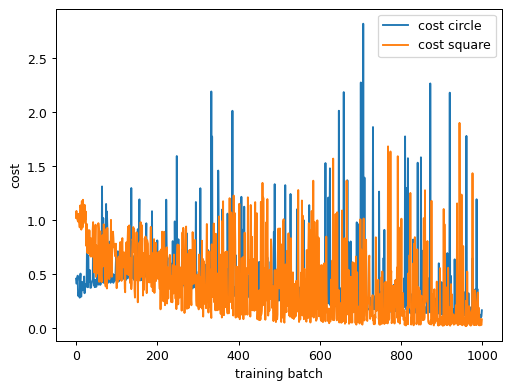

In [15]:
plt.plot(costs_circle, label ='cost circle')
plt.plot(costs_square, label ='cost square')
plt.xlabel('training batch')
plt.ylabel('cost')
plt.legend()

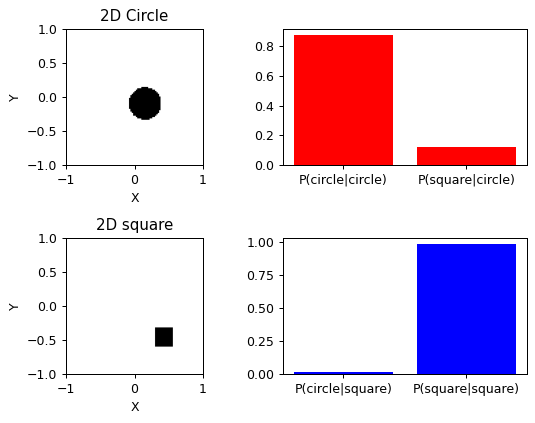

In [43]:

fig, axs = plt.subplots(2, 2)

# Circle
circle_mask = generate_rand_circle(v0, v1)
y_in_circle = circle_mask.flatten() # dimension (N_points,)
y_in_circle_transposed = np.transpose(y_in_circle[..., np.newaxis])

result_circle= Net.predict_on_batch(y_in_circle_transposed)

axs[0,0].imshow(circle_mask, extent=(-1, 1, -1, 1), cmap='binary')
axs[0,0].set_xlabel('X')
axs[0,0].set_ylabel('Y')
axs[0,0].set_title('2D Circle')

result_circle_plot = ['P(circle|circle)', 'P(square|circle)'] #conditional prob.
axs[0,1].bar(result_circle_plot, np.array(result_circle).flatten(), color = 'red')


# Square
square_mask = generate_rand_square(v0, v1)
y_in_square = square_mask.flatten() # dimension (N_points,)
y_in_square_transposed = np.transpose(y_in_square[..., np.newaxis])

result_square= Net.predict_on_batch(y_in_square_transposed)

axs[1,0].imshow(square_mask, extent=(-1, 1, -1, 1), cmap='binary')
axs[1,0].set_xlabel('X')
axs[1,0].set_ylabel('Y')
axs[1,0].set_title('2D square')

result_square_plot = ['P(circle|square)', 'P(square|square)'] #conditional prob.
axs[1,1].bar(result_square_plot, np.array(result_square).flatten(), color = 'blue')


fig.tight_layout()

# Adding noise

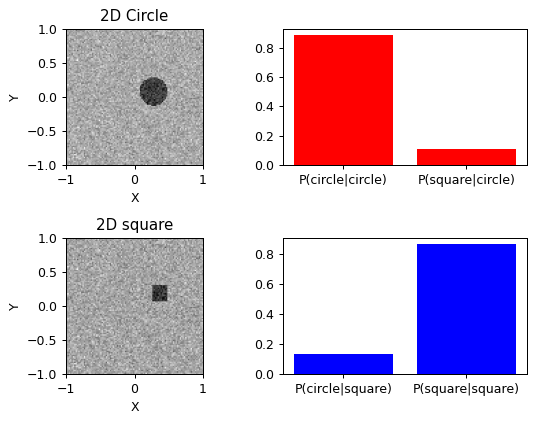

In [41]:

fig, axs = plt.subplots(2, 2)

# Circle
circle_mask = generate_rand_circle(v0, v1)

noise_stddev = 0.2
noise = np.random.normal(loc=0, scale=noise_stddev, size=(len(v0), len(v1)))
circle_mask_with_noise = circle_mask + noise


y_in_circle = circle_mask_with_noise.flatten() # dimension (N_points,)
y_in_circle_transposed = np.transpose(y_in_circle[..., np.newaxis])

result_circle= Net.predict_on_batch(y_in_circle_transposed)

axs[0,0].imshow(circle_mask_with_noise, extent=(-1, 1, -1, 1), cmap='binary')
axs[0,0].set_xlabel('X')
axs[0,0].set_ylabel('Y')
axs[0,0].set_title('2D Circle')

result_circle_plot = ['P(circle|circle)', 'P(square|circle)'] #conditional prob.
axs[0,1].bar(result_circle_plot, np.array(result_circle).flatten(), color = 'red')


# Square
square_mask = generate_rand_square(v0, v1)
square_mask_with_noise = square_mask + noise

y_in_square = square_mask_with_noise.flatten() # dimension (N_points,)
y_in_square_transposed = np.transpose(y_in_square[..., np.newaxis])

result_square= Net.predict_on_batch(y_in_square_transposed)

axs[1,0].imshow(square_mask_with_noise, extent=(-1, 1, -1, 1), cmap='binary')
axs[1,0].set_xlabel('X')
axs[1,0].set_ylabel('Y')
axs[1,0].set_title('2D square')

result_square_plot = ['P(circle|square)', 'P(square|square)'] #conditional prob.
axs[1,1].bar(result_square_plot, np.array(result_square).flatten(), color = 'blue')


fig.tight_layout()